# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = f"{url}q={city}&appid={weather_api_key}"

        response = requests.get(city_weather)
        data = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | pimentel
Processing Record 3 of Set 1 | yinchuan
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | pyay
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | crane
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | vernon
Processing Record 13 of Set 1 | taoudenni
Processing Record 14 of Set 1 | kristiansund
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | mocoreta
Processing Record 18 of Set 1 | colesberg
Processing Record 19 of Set 1 | ahau
City not found. Skipping...
Processing Record 20 of Set 1 | saint-pierre
Processing Record 21 of Set 1 | baotou
Processing Record 22 of Set 1 | st. joh

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,272.24,93,0,0.00,CA,1697361569
1,pimentel,-6.8367,-79.9342,292.31,88,100,5.14,PE,1697361570
2,yinchuan,38.4681,106.2731,293.75,15,0,1.00,CN,1697361354
3,anadyr,64.7500,177.4833,273.43,93,75,4.00,RU,1697361573
4,pyay,18.8167,95.2167,304.32,65,31,1.80,MM,1697361574


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,272.24,93,0,0.00,CA,1697361569
1,pimentel,-6.8367,-79.9342,292.31,88,100,5.14,PE,1697361570
2,yinchuan,38.4681,106.2731,293.75,15,0,1.00,CN,1697361354
3,anadyr,64.7500,177.4833,273.43,93,75,4.00,RU,1697361573
4,pyay,18.8167,95.2167,304.32,65,31,1.80,MM,1697361574


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

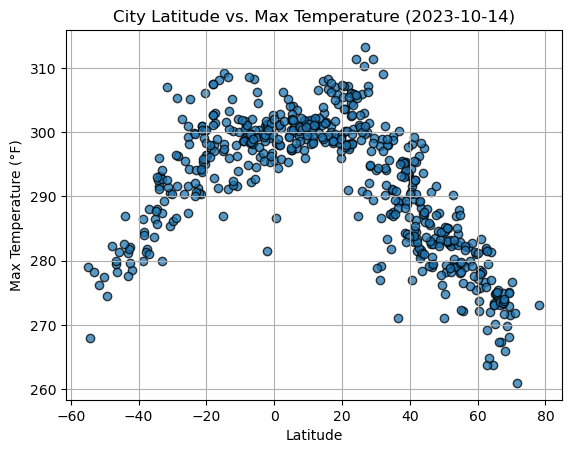

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-14)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

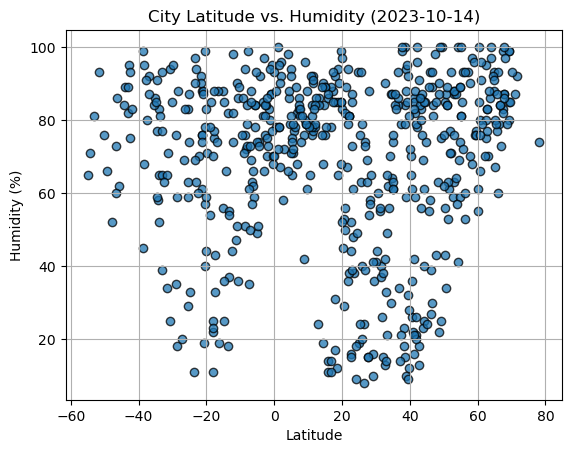

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-14)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

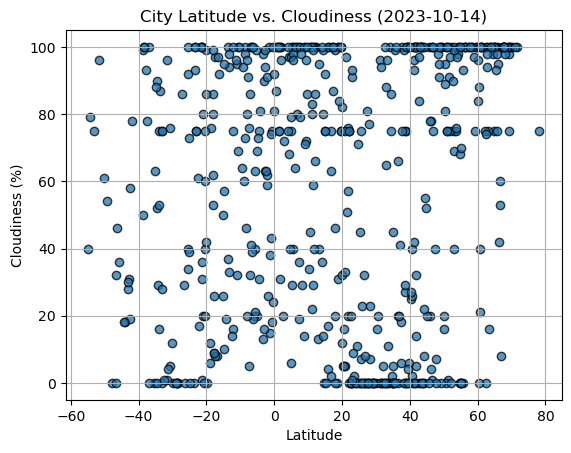

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-14)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

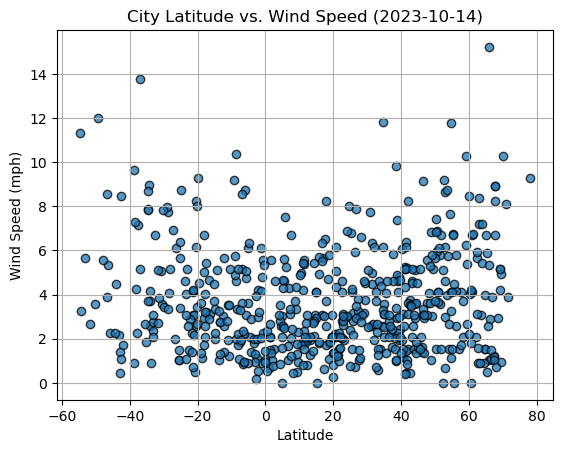

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-14)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,272.24,93,0,0.00,CA,1697361569
2,yinchuan,38.4681,106.2731,293.75,15,0,1.00,CN,1697361354
3,anadyr,64.7500,177.4833,273.43,93,75,4.00,RU,1697361573
4,pyay,18.8167,95.2167,304.32,65,31,1.80,MM,1697361574
7,bethel,41.3712,-73.4140,282.88,86,96,0.45,US,1697361561


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pimentel,-6.8367,-79.9342,292.31,88,100,5.14,PE,1697361570
5,edinburgh of the seven seas,-37.0676,-12.3116,288.08,92,100,13.76,SH,1697361575
6,puerto natales,-51.7236,-72.4875,276.14,93,96,2.69,CL,1697361379
9,waitangi,-43.9535,-176.5597,286.94,89,18,4.47,NZ,1697361579
10,port elizabeth,-33.9180,25.5701,291.66,83,75,2.57,ZA,1697361495


###  Temperature vs. Latitude Linear Regression Plot

y = -0.49x +307.76
The r-value is: 0.7374497823920545


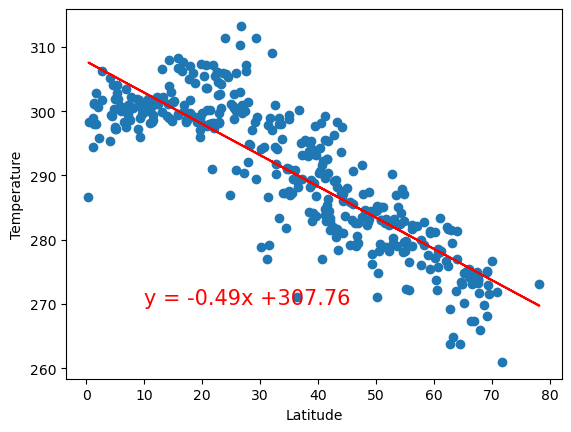

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,270),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.43x +303.26
The r-value is: 0.5597213640757488


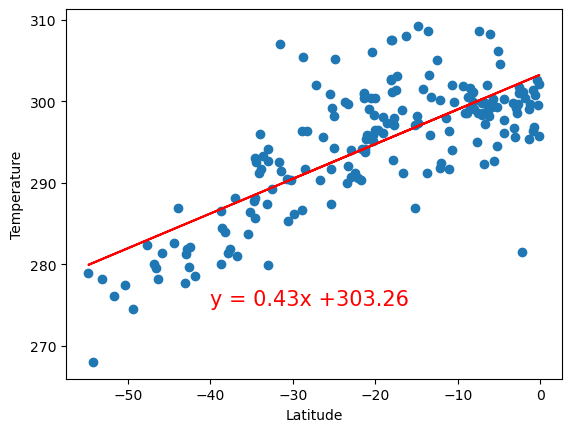

In [16]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,275),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.13x +63.92
The r-value is: 0.009877855555105099


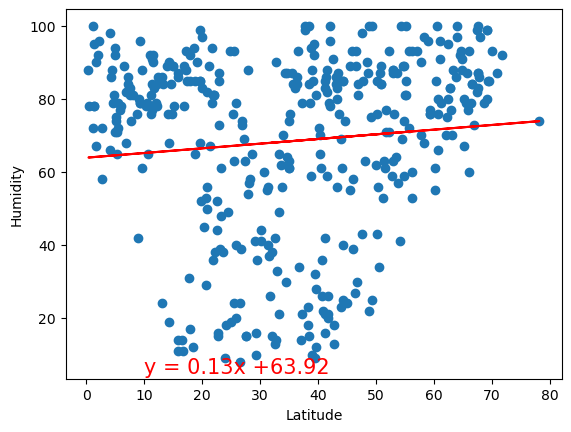

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(10,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.01x +69.71
The r-value is: 8.266866031882324e-05


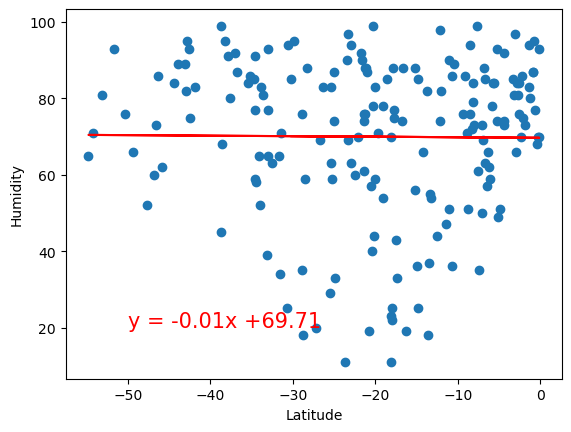

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.3x +48.23
The r-value is: 0.019941916704887774


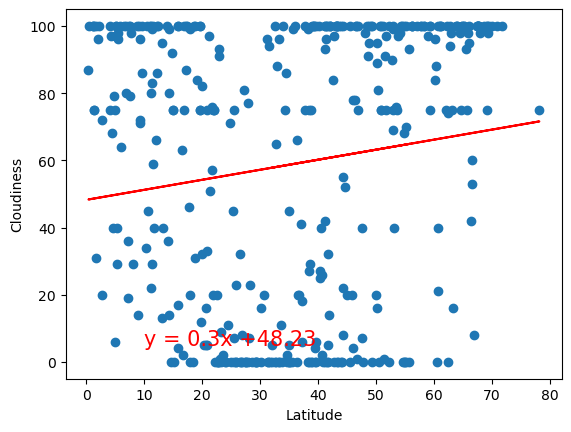

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(10,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.47x +64.05
The r-value is: 0.03441544008894344


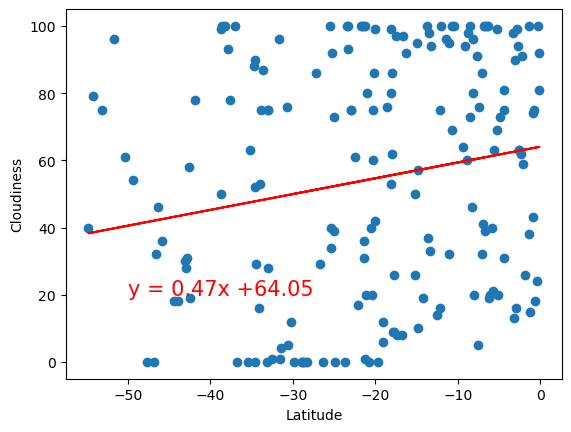

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.03x +2.47
The r-value is: 0.06744432560621297


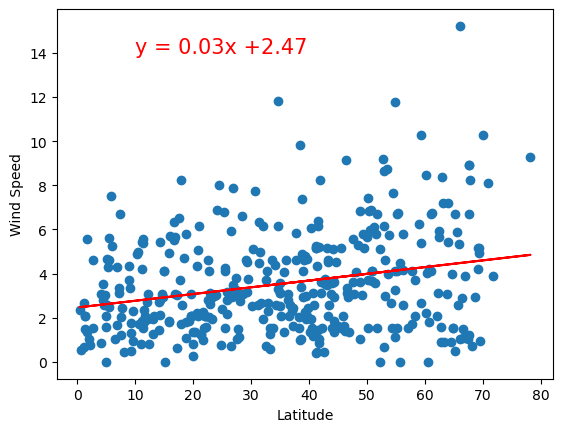

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,14),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.05x +2.86
The r-value is: 0.07359004464375289


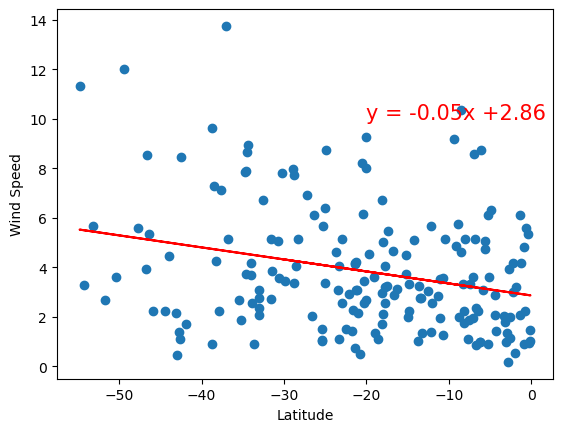

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
#Firstly, based on the first set of graphs (temperature vs. latitude linear regression plot), the temperature has a moderate negative relationship with latitude (with an r-square value of 0.75), while the temperature exhibits a moderate positive relationship with latitude (with an r-square value of 0.63).

#Then, based on the second set of graphs (humidity vs. latitude linear regression plot), there is no clearly linear relationship between humidity and latitude (northern hemisphere r-square value: 0.02; southern hemisphere r-square value: 0.007), as the data points are randomly scattered on the graph.

#In the third set of graphs (cloudiness vs. latitude linear regression plot), there is also no clearly linear relationship between cloudiness and latitude (northern hemisphere r-square value: 0.01; southern hemisphere r-square value: 0.004), as the data points are primarily located at the two extremes along the y-axis.

#Lastly, based on the third set of graphs (cloudiness vs. latitude linear regression plot), there is no clearly linear relationship between cloudiness and latitude in the northern hemisphere (with an r-square value of 0.07), while there might be a very weak negative linear relationship between cloudiness and latitude in the southern hemisphere (with an r-square value of 0.11).

#The analysis results are based on single-day data from the OpenWeatherMap API, and as such, they may not be highly representative of relationships throughout the entire year or over longer periods.